slope: 1.402807992315661 +/- 0.0012453815116123374
intercept: 0.39064931565642935 +/- 0.004379984580442021


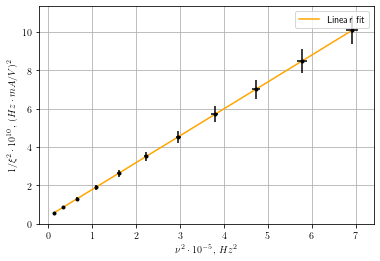

slope: -0.025065067193643476 +/- 0.0014042996769857066
intercept: 4.503305018008021 +/- 0.2047100965612612


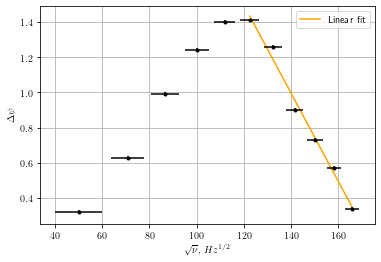

In [28]:
from cmath import sqrt
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from scipy.stats import linregress
plt = reload(plt)

plt.rcParams['text.usetex'] = True
plt.grid()
plt.xlabel(r'$\nu^2 \cdot 10^{-5},\, Hz^2$')
plt.ylabel(r'$1/\xi^2 \cdot 10^{10},\, (Hz\cdot mA/V)^2$')

nu = [0.13, 0.34, 0.66, 1.08, 1.60, 2.23, 2.96, 3.79, 4.73, 5.78, 6.92]
nu_err = [0.002, 0.007, 0.013, 0.022, 0.032, 0.045, 0.059, 0.076, 0.095, 0.116, 0.138]

xi = [0.57, 0.87, 1.31, 1.90, 2.64, 3.52, 4.54, 5.73, 7.02, 8.50, 10.09]
xi_err = [0.058, 0.070, 0.098, 0.138, 0.189, 0.250, 0.322, 0.409, 0.503, 0.613, 0.733]

coef = np.polyfit(nu, xi, 1)
poly = np.poly1d(coef)

p, V = np.polyfit(nu, xi, 1, cov=True)
print("slope: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("intercept: {} +/- {}".format(p[1], np.sqrt(V[1][1])))

lin_xi = poly(nu)

plt.plot(nu, lin_xi, color = 'orange')
plt.errorbar(nu, xi, xerr = nu_err, yerr = xi_err, fmt ='.', color ='black')

plt.legend([r'Linear fit'])
plt.savefig('PIC_5.png', dpi = 1200)
plt.show()




plt.grid()
plt.xlabel(r'$\sqrt{\nu},\, Hz^{1/2}$')
plt.ylabel(r'$\Delta \psi$')

nu = [2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500]
nu_err = [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

r_nu = []
r_nu_err = []

for it in nu:
    r_nu.append((sqrt(it)).real)

for it, err in enumerate(nu_err):  
    r_nu_err.append((err / (2 * r_nu[it])).real)


psi = [0.32, 0.63, 0.99, 1.24, 1.40, 1.41, 1.26, 0.90, 0.73, 0.57, 0.34]
psi_err = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

lin_nu = r_nu[5 :]
lin_nu_err = r_nu_err[5 :]

lin_psi = psi[5 :]
lin_psi_err = psi_err[5 :]


coef = np.polyfit(lin_nu, lin_psi, 1)
poly = np.poly1d(coef)

p, V = np.polyfit(lin_nu, lin_psi, 1, cov=True)
print("slope: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("intercept: {} +/- {}".format(p[1], np.sqrt(V[1][1])))

lin_psi_gr = poly(lin_nu)

plt.plot(lin_nu, lin_psi_gr, color = 'orange')
plt.errorbar(r_nu, psi, xerr = r_nu_err, yerr = psi_err, fmt ='.', color ='black')

plt.legend([r'Linear fit'])
plt.savefig('PIC_6.png', dpi = 1200)
plt.show()
